In [1]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [2]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [3]:
# read the file into a list for analysis
df = pd.read_excel('list.xlsx', sheet_name='Sheet1')
sen_list = []
for values in df.values:
    sen_list.append(values[0])
sen_list

["Do a little spring cleanin'",
 "I'm always too busy\u2005dreamin'",
 'Well,\u2005maybe I should\u2005wake up instead',
 'A lot of things\u2005I regret, but I just say I forget',
 "Why can't it just be easy?",
 'Why does everybody need me to stay?',
 "Oh, I hate the feelin'",
 "When you're high, but you're underneath the ceilin'",
 "Got the cards in my hand, I hate dealin', yeah",
 "Get everything I need, then I'm gone, but it ain't stealin'",
 'Can I get a break?',
 'I wish that I could just get out my goddamn way',
 'What is there to say?',
 "There ain't a better time than today",
 "Well, maybe I'll lay down for a little, yeah",
 "Instead of always tryin' to figure everything out",
 'And all I do is say sorry',
 "Half the time I don't even know what I'm sayin' it about",
 'Good news, good news, good news',
 "That's all they wanna hear",
 "No, they don't like it when I'm down",
 "But when I'm flyin', oh",
 "It make 'em so uncomfortable",
 "So different, what's the difference?",
 "Whe

In [4]:
# analyse each element of list and generate a compound value based on sentiment
compound_values = []
for sen in sen_list:
    compound_values.append(sia.polarity_scores(sen)["compound"])
 
print(compound_values)   

[0.0, 0.0, 0.2732, -0.5023, 0.4404, 0.0, -0.5719, 0.0, 0.1779, 0.0, 0.0, -0.1027, 0.0, -0.3412, 0.4601, 0.0, -0.0772, 0.0, 0.8271, 0.0, -0.5122, 0.0, -0.5214, 0.0, 0.431, -0.4767, 0.0, 0.4404, -0.647, 0.3612, -0.4118, 0.3591, 0.0, 0.7506, 0.0, 0.0, 0.0, 0.4215, -0.296, -0.4019, 0.8271, 0.0, -0.5122, 0.0, -0.5214, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6908, 0.6059, 0.2235]


In [5]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"line": sen_list,
                      "compound_values": compound_values})
df_out.to_csv('out.csv', index=False)  

<Axes: xlabel='Lyrics', ylabel='Sentiment Polarity'>

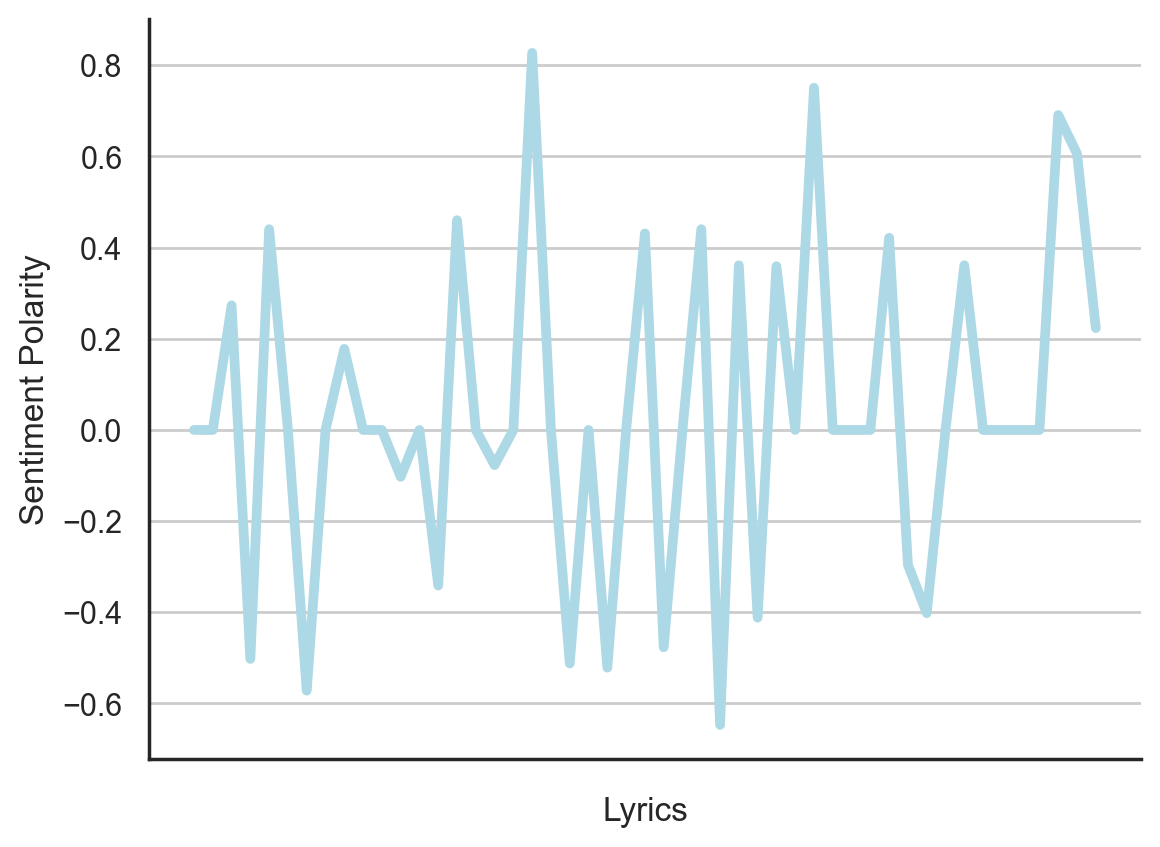

In [16]:
# create a line graph to visualize the ups and downs
line = sns.lineplot(x='line', 
                    y='compound_values', 
                    data=df_out,
                    color='lightblue',
                    linewidth=3.5)
line.set(xticklabels=[])
sns.despine()
sns.set_style("white")
line.grid(axis='y')
plt.xlabel('Lyrics')
plt.ylabel('Sentiment Polarity')
line

In [17]:
# write a pdf report, then delete this block